### Curso de imágenes - Especialidad I (2018) - FAMAF-UNC

**Alumna: L. Fischer**

# Trabajo practico nº 1

## Ejercicio 1:

**Método de umbralamiento** para la detección de bordes externos.


El método de umbralamiento consiste en generar una imagen binaria donde se distinguen los píxeles de interés (objeto) del fondo. Para realizar el umbralamiento, se analizan los valores de intensidad de los píxeles. Aquellos que superen un valor de umbral preestablecido son detectados. Formalmente puede escribirse como:

$$ g(x,y) = \lbrace \begin{array}{lcc} 0 \hspace{1.5cm} si \hspace{0.5cm} f(x,y) \leq u \\ 1 \hspace{1.5cm} si \hspace{0.5cm}f(x,y) \gt u \end{array} $$

donde $f(x, y)$ es la función que describe la imagen original, y $g(x, y)$ es la imagen binaria generada a partir del **umbral $u$**,  que es un valor de intensidad del pixel a definir por el usuario en función de sus intereses.

*Voy a utilizar la imagen de la mano de Röntgen para aplicar el método*
*Recordatorio: En banda 'L' --> Blanco:255, Negro:0.*

### Pasos a seguir:

Previo a la aplicación del método:

1. Importar librerias, establecer los graficos de matplotlib en el notebook. [1]

2. Importar la imagen y convertirla a una sola banda. [1]

3. Transformar la imagen en una matriz (array). [2]

Aplicación del método:

4. Elegir un umbral (`u`).[3]

5. Crear una nueva matriz binaria (sólo contiene 0 y 1) para definir los bordes.[4]

6. Comparar la imagen original y la obtenida usando el método. [5]


In [1]:
%matplotlib inline

from matplotlib import pyplot as plp
from PIL import Image

img = Image.open('../img/x-ray-rontgen.jpg')

img= img.convert("L")

In [2]:
import numpy as np

img_mat = np.array(img)
img_mat.shape

#¡REVELACIÓN! .shape me da ('filas', 'columnas') pero generalmente filas='eje y', columnas ='eje x' por eso (y,x)

(738, 471)

In [3]:
#Defino u como la media entre los valores de intensidad de la matriz. (podría elegir otro valor)

u = img_mat.mean()

#En el ejercicio 2 se puede ver la distribución de intensidades


In [4]:
def bordes(imagen, x, y, umbral):
    if imagen[y,x] <= umbral:
        a=0
    else:
        a=1
    return a

img_borde = np.zeros(img_mat.shape)

for i in range (img_mat.shape[1]):
    for j in range (img_mat.shape[0]):
        img_borde[j,i] = bordes(img_mat, i, j, u)



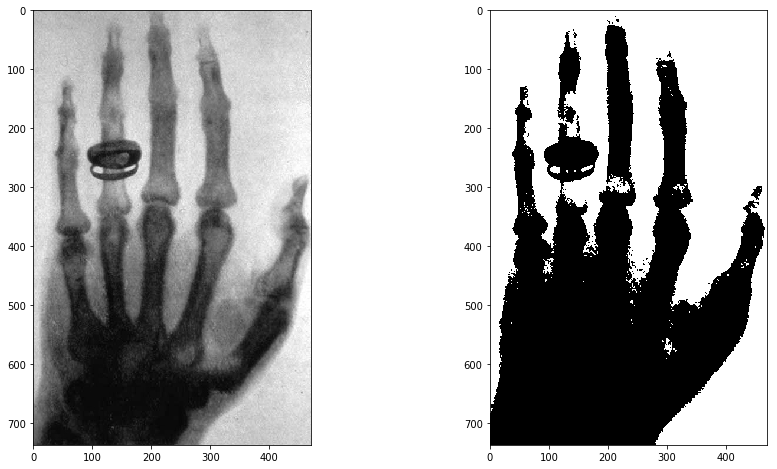

In [5]:
fig = plp.figure(figsize=(15,8))
ax1 = plp.subplot(121)
ax2 = plp.subplot(122)


ax1.imshow(img, cmap='gray', vmin=0, vmax=255)
ax2.imshow(img_borde,  cmap='gray')

plp.show()



### Aclaraciones:
*No mantuve la idea de pedir al programa "umbralamiento" que solo devuelva el valor 1 porque reescribe la matriz, entonces en vez de obtener una matriz con 1 y 0 obtengo una matriz con 1 y Nan. (se puede ver pidiendo un pixel donde esta el color blanco).*

*Quisiera que la lista de pasos a seguir (al comienzo) mantuviera la numeración pero no se como hacerlo.*

*El último problema es con la definición del metodo (en el ejercicio resuelto), yo designe que los puntos que estan debajo de u (umbral) sean ceros y los mayores al umbral sean 1 porque me parecía tenía más sentido.*

*La idea del método de detección de bordes creeria esta en el capítulo 4 no en el 2. Aunque en el capítulo 2 se nombra algo por arriba (2.2.4).*

### Notas

Bien, habría que ver si este método no determina regiones en vez de bordes, y considerar un segundo paso en la operación, a los fines de lograr una real detección de bordes.

## Ejercicio 2:

**Histrograma** de una imagen 2D de una banda.

El histograma se puede realizar con distintas librerias, entre ellas `Pillow (PIL)`, `Numpy`. Para graficarlo utilizo `matplotlib`.

La función `.histogram()` esta dentro del módulo `Image` y pertenece a `PIL` (ya fue importado anteriormente). También puede ser utilizada para imagenes RGB.

*Recordar PIL trabaja sobre la imagen ("img") y numpy trabaja sobre el array (se necesita llevar "img_matriz" a un vector)*

*Notar: si uso `pyplot` para graficar y la función `plot` el histograma se creará como una función (líneas) si utilizo la función `bar` obtendré un gráfico de barras *

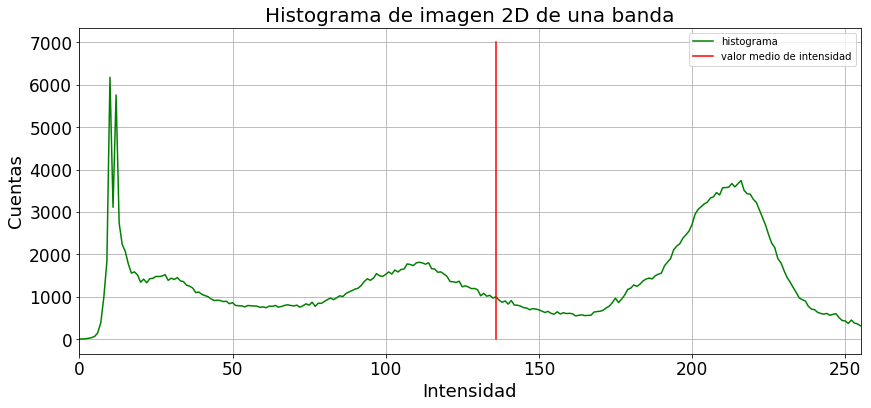

In [6]:
fig = plp.figure(figsize=(14,6))

p1= plp.plot(img.histogram(), color='green', label='histograma')
p2= plp.plot([136,136], [0,7000], '-', color='red', label='valor medio de intensidad')

plp.ylabel('Cuentas', fontsize=18)
plp.xlabel('Intensidad', fontsize=18)
plp.xticks(fontsize=17)
plp.xlim(xmin=0, xmax=255)
plp.yticks(fontsize=17)
plp.title('Histograma de imagen 2D de una banda', fontsize=20)
plp.grid(True)
plp.legend()
plp.show()

### Aclaración

No uso `plp.grid('on')` porque si bien lo ejecuta me tira un warning y me recomienda utilice `True` como argumento.

### Notas

Bien!

# Ejercicio 3:

**Modificacion de contraste** a una imagen médica 2D de 1 banda.

Aumentar(disminuir) el contraste en una imagen consiste en aumentar(disminuir) la pendiente de 45º de la linea recta que representa los grises entre input y output.

La transformación correspondiente es:

 $$ g(x, y) = \left( f(x, y) − 2^{N−1} \right) tan(\varphi) + 2^{N−1} $$

donde $g(x, y)$ es la imagen output, $f(x,y)$ es la imagen input, $N$ es la escala en bits de la imagen y el ángulo $\varphi$ corresponde a la pendiente.

*Voy a seguir utilizando la misma imagen que en el ejercicio 1 y 2 (variable "img_mat")*.

*Recordar: $\varphi$ en la escala original es 45°. La escala de la imagen es de 8 bits, N=8*.

*Es decir, espero obtener la imagen original si hago la transformación de 45°*.

*No puedo tomar $\varphi = 90°$ porque la tangente no esta definida, si lo tomo como 0 obtengo una imagen completamente saturada (toda blanca)*

## Pasos a seguir:

Crear un programa generico donde sólo se modifiquen los valores de los ángulos, si se trabaja con más de 3 valores se tiene que modificar también la configuración a la hora de graficar (última celda).

1. Elijo varios ángulos (30º,45º,60º). ¡Las funciones trabajan en radianes!. []
2. Escribo la transformación de contraste definida y la aplico.
3. Grafico las  imagenes obtenidas.

In [7]:
N=8     #numero de bits

angulos= np.array([30,45,60])  

ang_rad= angulos/180.*np.pi    

#voy a llamar a la función ang_rad para escribir el contraste

In [8]:
def contraste(imagen, x, y, l, bits): 
    imagen2 = (int(imagen[y,x]) - 2**(bits-1))*round(np.tan(ang_rad[l]),4) + 2**(bits-1)
    if imagen2 < 0:
        imagen2 = 0
    if imagen2 > 255:
        imagen2 = 255
    return imagen2


v = len(img_mat[:,0])  #len del eje y
w = len(img_mat[0,:])  #len del eje x
z = len(angulos)

img_cont = np.zeros([v,w,z])

for k in range (z):
    for i in range (w):
        for j in range (v):
            img_cont[j,i,k] = contraste(img_mat, i, j, k, N)



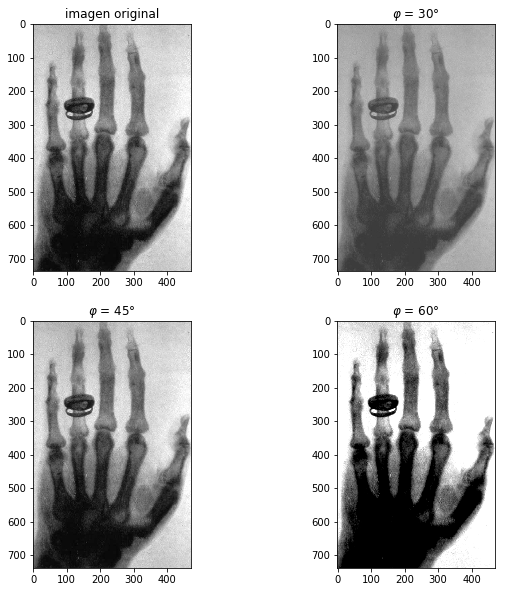

In [9]:
fig = plp.figure(figsize=(10,10))

ax1 = plp.subplot(221)
ax2 = plp.subplot(222)
ax3 = plp.subplot(223)
ax4 = plp.subplot(224)

ax1.imshow(img_mat, cmap='gray', vmin=0, vmax=255)
ax2.imshow(img_cont[:,:,0], cmap='gray', vmin=0, vmax=255)
ax3.imshow(img_cont[:,:,1], cmap='gray', vmin=0, vmax=255)
ax4.imshow(img_cont[:,:,2], cmap='gray', vmin=0, vmax=255)

ax1.set_title(u'imagen original')
ax2.set_title(r'$\varphi$ = {}'.format(angulos[0]) + u'°')
ax3.set_title(r'$\varphi$ = {}'.format(angulos[1]) + u'°')
ax4.set_title(r'$\varphi$ = {}'.format(angulos[2]) + u'°')

plp.show()

### Aclaraciones:

Es lógico esperar que la imagen que tiene $\varphi$=45° sea igual que la imagen original. De hecho espero que al aumentar el ángulo aumente el contraste y al diminuirlo disminuya. 

Las siguientes lineas sirven para corroborar que la imagen original coincide con la imagen de 45°

*Programita de chequeo:*

Mínimo:0.0 Máximo:0.0


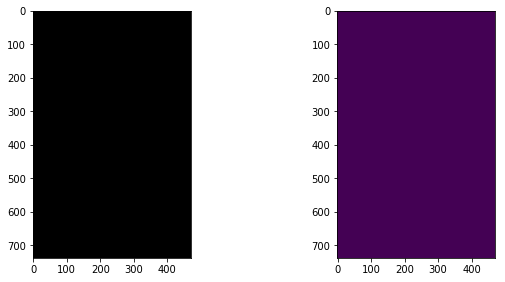

In [29]:
imagen_prueba = np.ones(img_mat.shape)

for i in range (w):
            for j in range (v):
                imagen_prueba[j,i] = img_mat[j,i]-img_cont[j,i,1]


#No puedo usar getextrema() [modulo de PIL] porque es un np.array

minimo = np.amin(imagen_prueba)
maximo = np.amax(imagen_prueba)

print("Mínimo:{}".format(minimo),"Máximo:{}".format(maximo))
                
#Grafico                
fig = plp.figure(figsize=(10,10))

ax1 = plp.subplot(221)
ax2 = plp.subplot(222)

ax1.imshow(imagen_prueba, cmap='gray', vmin=0, vmax=255)
ax2.imshow(imagen_prueba)

plp.show()


### Notas

Bien!

# Ejercicio 4:

**Modificacion de color** a una imagen medica 2D de 1 banda y analisis del efecto del parametro $\gamma$.

La **corrección $\gamma$** es una técnica sencilla de modificación de colores en una imagen. En la cual el algoritmo de transformación se obtiene de la ecuación:

$$ g(x,y) = (2^N -1) \left( \frac{f(x,y)}{(2^N -1)} \right)^{1/\gamma} $$

*Tener en cuenta que $\gamma$ toma valores reales y que si $\gamma$=1 no hay corrección*
*Espero que para valores mayores a 1 haya correcciones grandes para pequeños valores de input (negros) y para valores menores a uno grandes correcciones para grandes valores de input (blancos)*

*Sigo utilizando la misma imagen que en los ejercicios anteriores, nuevamente voy a trabajar sobre 'img_mat'*

In [11]:
gm=np.array([0.5,1.,1.5])
N=8

#en vez de poner el valor de gamma como input pongo k y obtengo gamma como: gm(k)
def color(imagen, x, y, k, N):  
    
    imagen2= (2.**N-1)*(imagen[y,x]/(2.**N-1))**(1./gm[k])
    return imagen2

img_color=np.zeros([v,w,len(gm)])

for k in range (len(gm)):
    for i in range (w):
            for j in range (v):
                img_color[j,i,k] = color(img_mat, i, j, k, N)


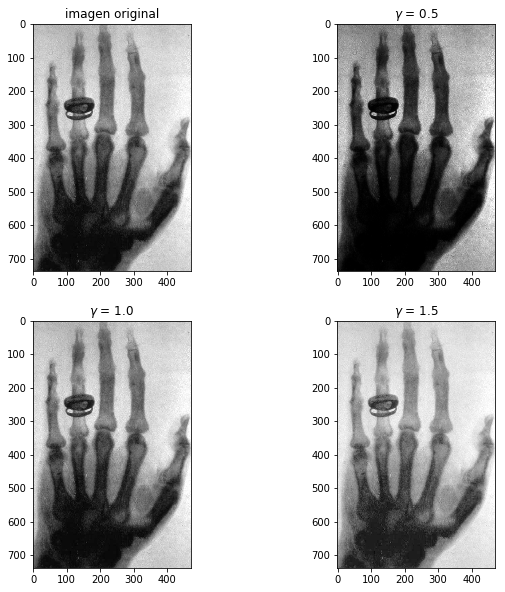

In [12]:
fig = plp.figure(figsize=(10,10))

ax1 = plp.subplot(221)
ax2 = plp.subplot(222)
ax3 = plp.subplot(223)
ax4 = plp.subplot(224)

ax1.imshow(img_mat, cmap='gray', vmin=0, vmax=255)
ax2.imshow(img_color[:,:,0], cmap='gray', vmin=0, vmax=255)
ax3.imshow(img_color[:,:,1], cmap='gray', vmin=0, vmax=255)
ax4.imshow(img_color[:,:,2], cmap='gray', vmin=0, vmax=255)

ax1.set_title(u'imagen original')
ax2.set_title(r'$\gamma$ = {}'.format(gm[0]))
ax3.set_title(r'$\gamma$ = {}'.format(gm[1]))
ax4.set_title(r'$\gamma$ = {}'.format(gm[2]))

plp.show()

### Aclaraciones:

Al igual que en el ejercicio anterior en el caso de $\varphi=45$ espero en este ejercicio mi imagne original coincida con la que corresponde a $\gamma=1$.

**Extra**
Creyendo podía haber problemas causados con el código tabajé con matrices en 2D y compare los resultados. *[primer programa de chequeo]*

Defino una matriz que es la resta de la original y $\gamma=1$ y me da que son iguales. *[segundo programa de chequeo]*


*Programitas de chequeo*

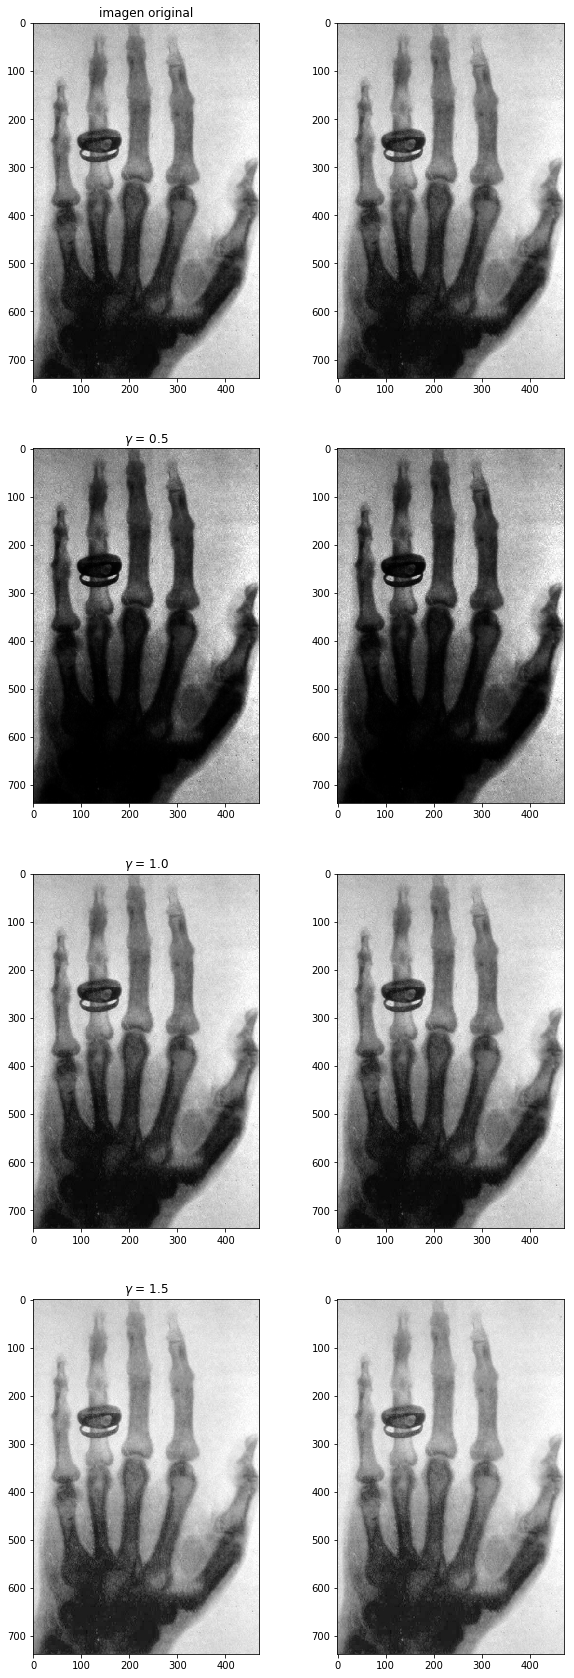

In [13]:
#creo de otra forma la matriz

imgcolor1=np.zeros([v,w])
imgcolor2=np.zeros([v,w])
imgcolor3=np.zeros([v,w])

for i in range (w):
    for j in range (v):
        imgcolor1[j,i] = color(img_mat, i, j, 0, N)
        imgcolor2[j,i] = color(img_mat, i, j, 1, N)
        imgcolor3[j,i] = color(img_mat, i, j, 2, N)
        
#ploteo para ver si hay diferencias
fig = plp.figure(figsize=(10,30)) #figsize(x,y)
                 
ax1 = plp.subplot(421)
ax2 = plp.subplot(422)
ax3 = plp.subplot(423)
ax4 = plp.subplot(424)
ax5 = plp.subplot(425)
ax6 = plp.subplot(426)
ax7 = plp.subplot(427)
ax8 = plp.subplot(428)


ax1.imshow(img_mat, cmap='gray', vmin=0, vmax=255)
ax3.imshow(imgcolor1, cmap='gray', vmin=0, vmax=255)
ax5.imshow(imgcolor2, cmap='gray', vmin=0, vmax=255)
ax7.imshow(imgcolor3, cmap='gray', vmin=0, vmax=255)
ax2.imshow(img_mat, cmap='gray', vmin=0, vmax=255)
ax4.imshow(img_color[:,:,0], cmap='gray', vmin=0, vmax=255)
ax6.imshow(img_color[:,:,1], cmap='gray', vmin=0, vmax=255)
ax8.imshow(img_color[:,:,2], cmap='gray', vmin=0, vmax=255)


ax1.set_title(u'imagen original')
ax3.set_title(r'$\gamma$ = {}'.format(gm[0]))
ax5.set_title(r'$\gamma$ = {}'.format(gm[1]))
ax7.set_title(r'$\gamma$ = {}'.format(gm[2]))

plp.show()

Minimo:0.0 Maximo:0.0


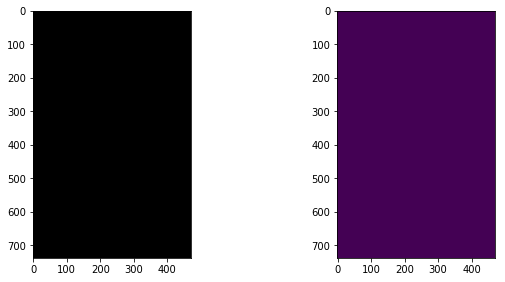

In [14]:
#chequeo restando las matrices.
imagen_prueba2 = np.ones(img_mat.shape)

for i in range (w):
            for j in range (v):
                imagen_prueba2[j,i] = img_mat[j,i]-img_color[j,i,1]

#Extremos de la matriz:
minimo = np.amin(imagen_prueba)
maximo = np.amax(imagen_prueba)

print("Minimo:{}".format(minimo),"Maximo:{}".format(maximo))

#Grafico
fig = plp.figure(figsize=(10,10))

ax1 = plp.subplot(221)
ax2 = plp.subplot(222)

ax1.imshow(imagen_prueba2, cmap='gray', vmin=0, vmax=255)
ax2.imshow(imagen_prueba2)

plp.show()

### Notas

Bien!

# Ejercicio 5:

**Modificación de imagen: flip y un mirror** de una imagen medica 2D de 1 banda.

La inversión o flip consiste en una transformación que produce un "movimiento" en la columna 'm' de la fila 'n' a la fila 'N-1-n' siendo N la dimensión en la dirección de 'n'.

$$ g(x,y) = f(x,N-1-y) $$

La reflexión o mirror es análoga al caso anterior pero el "movimiento" sucede en la fila 'n' entre las comunas 'm' y 'M-1-m' siendo M la dimensión en la dirección de 'm'.

$$ g(x,y) = f(M-1-x,y)  $$

In [15]:
img_flip = np.zeros(img_mat.shape)
img_mirror = np.zeros(img_mat.shape)

N=len(img_mat[:,0])  #y
M=len(img_mat[0,:])  #x

def flip(imagen, x, y):
    imagen2= imagen[N-1-y,x]
    return imagen2

def mirror(imagen, x, y):
    imag2= imagen[y,M-1-x]
    return imag2


for n in range(N):
    for m in range(M):
        img_flip[n,m] = flip(img_mat, m, n)
        img_mirror[n,m] = mirror(img_mat, m, n)


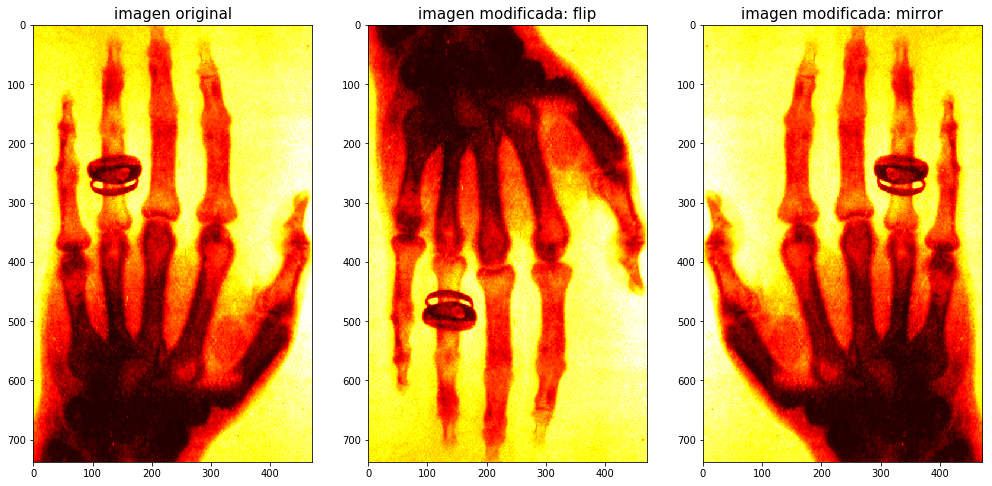

In [16]:
fig = plp.figure(figsize=(17,30)) #figsize(x,y)
                 
ax1 = plp.subplot(131)
ax2 = plp.subplot(132)
ax3 = plp.subplot(133)

ax1.imshow(img_mat, cmap='hot', vmin=0, vmax=255)
ax2.imshow(img_flip, cmap='hot', vmin=0, vmax=255)
ax3.imshow(img_mirror, cmap='hot', vmin=0, vmax=255)

ax1.set_title(u'imagen original', fontsize=15)
ax2.set_title(u'imagen modificada: flip', fontsize=15)
ax3.set_title(u'imagen modificada: mirror', fontsize=15)

plp.show()

### Aclaración:

Las fórmulas las modifique respecto a las del apunte, me parece que están mal escritas porque sino las cosas se van fuera de rango.

### Notas

Bien!

## Ejercicio 6:

**Métodos de interpolación: vecino mas cercano, lineal y bicúbica** de una imagen médica 2D de una banda y comparación cuantitativa de sus performance.

A partir de un muestreo de input se estiman los valores de la intensidad en puntos diferentes a aquellos donde sí se conoce el valor. 

La interpolación al vecino más cercano considera los 2 pixeles mas cercanos a $f(n,m)$ y realiza un promedio entre ellos para determinar el valor del pixel (n,m).

$$\text{vecinos más cercanos en y:} \hspace{2cm} g(n,m)= \frac{f(n,m+1) + f(n,m-1)}{2} $$

$$\text{vecinos más cercanos en x:} \hspace{2cm} g(n,m)= \frac{f(n+1,m) + f(n-1,m)}{2} $$


La técnica de interpolación lineal considera los 4 pixeles mas cercanos a $f(n,m)$ y realiza un promedio entre ellos para determinar el valor del pixel (n,m).

$$g(n,m)= \frac{f(n,m+1) + f(n,m-1) + f(n+1,m) + f(n-1,m)}{4} $$

La técnica de interpolación bicúbica considera los 8 pixeles mas cercanos a $f(n,m)$ y realiza un promedio entre ellos para determinar el valor del pixel (n,m).

$$g(n,m)= \frac{f(n,m+1) + f(n,m-1) + f(n+1,m)  + f(n-1,m) + f(n-1,m-1) + f(n-1,m+1) + f(n+1,m-1) + f(n+1,m+1)}{8} $$




*Notar:*

*El input en todos los casos es "img_mat" que es una matriz NxM, con N=738 , M=471*

*En el caso de interpolación al vecino más cercano obtengo una matriz (N-2)xM si sigo la primer definición 
sino obtengo una matriz Nx(M-2)*

*En las otras dos interpolaciones voy a obtener matrices (N-2)x(M-2)*

In [17]:
img_int2y = np.zeros((N-2,M))
print (img_mat.shape, img_int2y.shape)

(738, 471) (736, 471)


In [18]:
def interpolacion2y(imagen, x, y):
    imagen2 = (int(imagen[y+1,x]) + int(imagen[y-1,x]))/2.
    return imagen2

def interpolacion2x(imagen, x, y):
    imagen2 = (int(imagen[y,x+1]) + int(imagen[y,x-1]))/2
    return imagen2

N=len(img_mat[:,0])
M=len(img_mat[0,:])

img_int2y = np.zeros((N-2,M))
img_int2x = np.zeros((N,M-2))

for n in range(N-2):
    for m in range(M):
        img_int2y[n,m] = interpolacion2y(img_mat, m, n+1)

for n in range(N):
    for m in range(M-2):
        img_int2x[n,m] = interpolacion2x(img_mat, m+1, n)


In [19]:
def interpolacion4(imagen, x, y):
    imagen4 = (int(imagen[y+1,x]) + int(imagen[y-1,x])+ int(imagen[y,x+1]) + int(imagen[y,x-1]))/4.
    return imagen4

img_int4 = np.zeros((N-2,M-2))

for n in range(N-2):
    for m in range(M-2):
        img_int4[n,m] = interpolacion4(img_mat, m+1, n+1)


In [20]:
def interpolacion8(imagen, x, y):
    imagen8 = (int(imagen[y+1,x]) + int(imagen[y-1,x])+ int(imagen[y,x+1]) + int(imagen[y,x-1]) +
               int(imagen[y+1,x+1]) + int(imagen[y-1,x-1])+ int(imagen[y-1,x+1]) + int(imagen[y+1,x-1]))/8.
    return imagen8

img_int8 = np.zeros((N-2,M-2))

for n in range(N-2):
    for m in range(M-2):
        img_int8[n,m] = interpolacion8(img_mat, m+1, n+1)


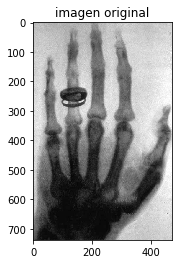

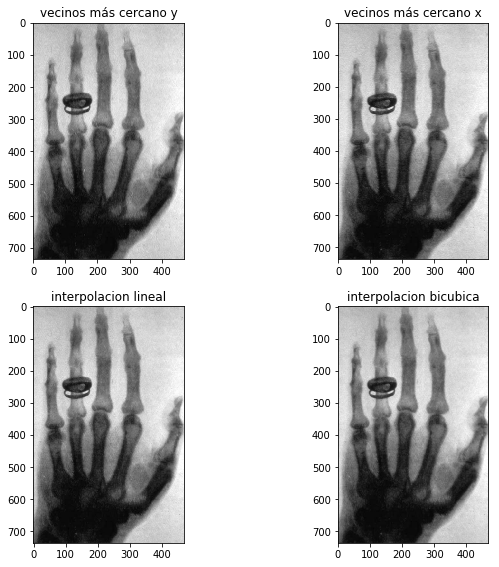

In [21]:
plp.title(u'imagen original')
plp.imshow(img_mat, cmap='gray', vmin=0, vmax=255)

fig = plp.figure(figsize=(10,20))

ax1 = plp.subplot(421)
ax2 = plp.subplot(422)
ax3 = plp.subplot(423)
ax4 = plp.subplot(424)

ax1.imshow(img_int2y, cmap='gray', vmin=0, vmax=255)
ax2.imshow(img_int2x, cmap='gray', vmin=0, vmax=255)
ax3.imshow(img_int4, cmap='gray', vmin=0, vmax=255)
ax4.imshow(img_int8, cmap='gray', vmin=0, vmax=255)

ax1.set_title(u'vecinos más cercano y')
ax2.set_title(u'vecinos más cercano x')
ax3.set_title(u'interpolacion lineal')
ax4.set_title(u'interpolacion bicubica')

plp.show()

### Aclaración

Dentro de `pyplot` la función `imshow` me permite hacer estas aproximaciones, voy a comparar los resultados con las que yo realice. Para más información leer: (interpolación)

https://matplotlib.org/api/_as_gen/matplotlib.pyplot.imshow.html

Cómo en mis imagenes no se nota ninguna diferencia significativa no voy a compararlas, sólo voy a dejar escritos los comandos.

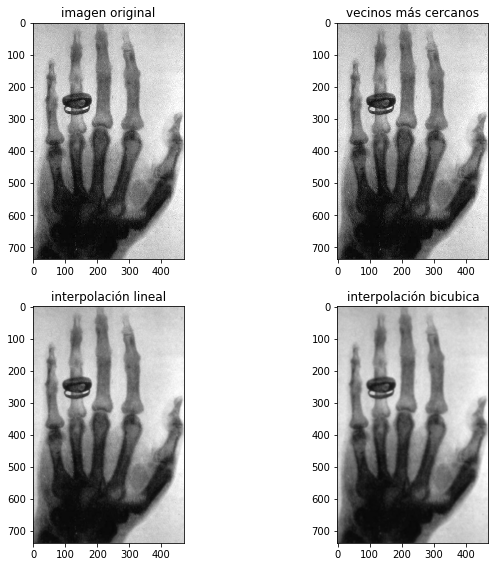

In [33]:
fig = plp.figure(figsize=(10,20))

ax1 = plp.subplot(421)
ax2 = plp.subplot(422)
ax3 = plp.subplot(423)
ax4 = plp.subplot(424)

ax1.imshow(img_mat, cmap='gray', vmin=0, vmax=255)
ax2.imshow(img_mat, cmap='gray', interpolation='nearest', vmin=0, vmax=255)
ax3.imshow(img_mat, cmap='gray', interpolation='bilinear', vmin=0, vmax=255)
ax4.imshow(img_mat, cmap='gray', interpolation='bicubic', vmin=0, vmax=255)

ax1.set_title(u'imagen original')
ax2.set_title(u'vecinos más cercanos')
ax3.set_title(u'interpolación lineal')
ax4.set_title(u'interpolación bicubica')

plp.show()

### Notas

Bien.

Otra forma podría ser tomando una sección pixelada de la imagen, con menos resolución y más pequeña, con lo que el suavizado debido a la interpolación se vería a simple vista al graficar las imágenes.

## Ejercicio 7:

Resaltar los bordes de una imagen médica 2D de 1 banda utilizando los siguientes kernels:

$$ w_1(k,l) = \left(
                \begin{array}{ccc} 
                    1 & 1 & 1 \\ 
                    0 & 0 & 0 \\ 
                    -1 & -1 & -1 
                 \end{array}
             \right) \hspace{1.5cm} \text{y} \hspace{1.5cm}
    w_2(k,l) = \left(
                \begin{array}{ccc} 
                    1 & 1 & 1 \\ 
                    0 & 0 & 0 \\ 
                    -1 & -1 & -1 
                 \end{array}
             \right)
$$


*Notar mis imagenes resultantes seran de tamaño (N-2)x(M-2) si la original era NxM*

In [23]:
N=len(img_mat[:,0])  #y
M=len(img_mat[0,:])  #x

In [24]:
def bordesmatriz1(imagen, x, y):
    imagen2 = ( int(imagen[y-1,x-1]) + int (imagen[y-1,x]) + int (imagen[y-1,x+1]) -
               int(imagen[y+1,x-1]) - int (imagen[y+1,x]) - int (imagen[y+1,x+1]))
    return imagen2

def bordesmatriz2(imagen, x, y):
    imagen3 = -1./8.*( int(imagen[y-1,x-1]) + int (imagen[y-1,x]) + int (imagen[y-1,x+1]) +
               int(imagen[y+1,x-1]) + int (imagen[y+1,x]) + int (imagen[y+1,x+1]) + 
                       int(imagen[y,x-1]) + int (imagen[y,x+1])) + int (imagen[y,x])
                     
    return imagen3

img_bm1 = np.zeros((N-2,M-2))
img_bm2 = np.zeros((N-2,M-2))

for n in range(N-2):
    for m in range(M-2):
        img_bm1[n,m] = bordesmatriz1(img_mat, m+1, n+1)
        img_bm2[n,m] = bordesmatriz2(img_mat, m+1, n+1)


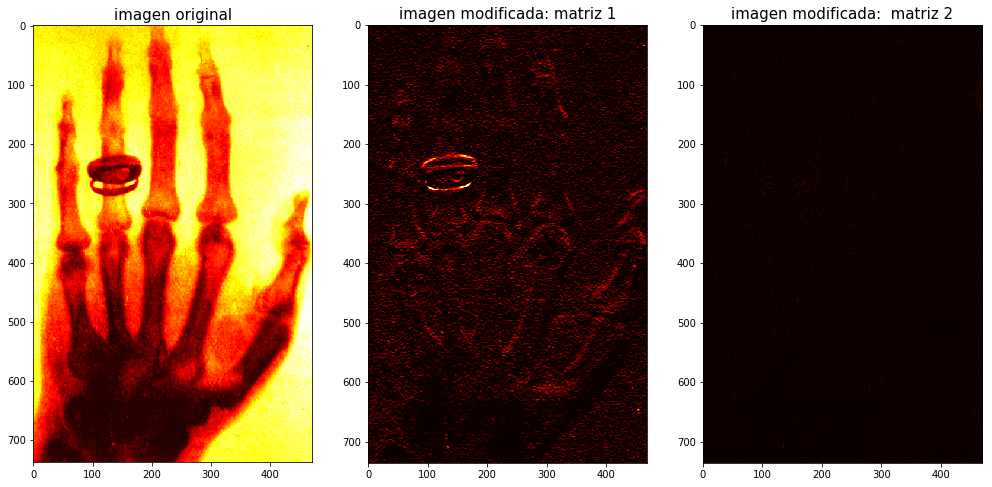

In [25]:
fig = plp.figure(figsize=(17,27)) #figsize(x,y)
                 
ax1 = plp.subplot(131)
ax2 = plp.subplot(132)
ax3 = plp.subplot(133)

ax1.imshow(img_mat, cmap='hot', vmin=0, vmax=255)
ax2.imshow(img_bm1, cmap='hot', vmin=0, vmax=255)
ax3.imshow(img_bm2, cmap='hot', vmin=0, vmax=255)

ax1.set_title(u'imagen original', fontsize=15)
ax2.set_title(u'imagen modificada: matriz 1', fontsize=15)
ax3.set_title(u'imagen modificada:  matriz 2', fontsize=15)

plp.show()

### Aclaración:

Puedo utilizar la función convolución en 2D (`convolve2d`) en `scipy.signal` para corroborar si mis resultados estan bien. 

*`numpy` también tiene función convolución pero para arrays de 1D*

In [26]:
#creo las matrices

matriz1 = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
matriz2 = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
matriz2 = matriz2/8.

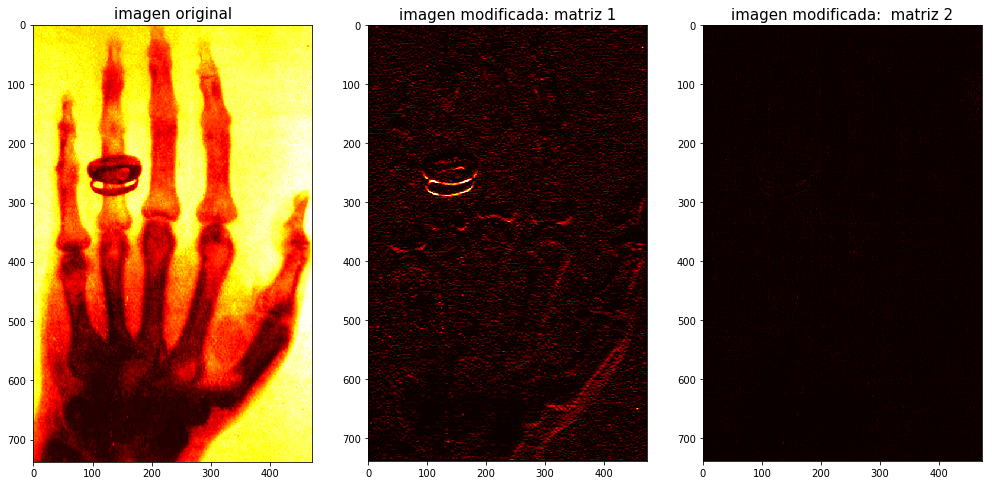

In [27]:
import scipy.signal as sig

img_conv1 = sig.convolve2d(img_mat, matriz1)
img_conv2 = sig.convolve2d(img_mat, matriz2)

fig = plp.figure(figsize=(17,27)) #figsize(x,y)
                 
ax1 = plp.subplot(131)
ax2 = plp.subplot(132)
ax3 = plp.subplot(133)

ax1.imshow(img_mat, cmap='hot', vmin=0, vmax=255)
ax2.imshow(img_conv1, cmap='hot', vmin=0, vmax=255)
ax3.imshow(img_conv2, cmap='hot', vmin=0, vmax=255)

ax1.set_title(u'imagen original', fontsize=15)
ax2.set_title(u'imagen modificada: matriz 1', fontsize=15)
ax3.set_title(u'imagen modificada:  matriz 2', fontsize=15)

plp.show()

### Notas

Agregar una conclusión/discusión al respecto. Se detectan bordes en la última imagen? Por qué?